In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import sys
reload(sys)
sys.setdefaultencoding("utf-8")
%matplotlib inline

In [2]:
restViolNT = pd.read_csv('restViolNT.csv')
restViolNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0


In [3]:
dataPoisNT = pd.read_csv('dataPoisNT.csv')
data311compNT = pd.read_csv('data311compNT.csv')
data311compNT.rename(columns={'pois_complaints':'311complaints'}, inplace=True)
dataPoisNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,pois_complaints
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,1.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,69.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,72.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,41.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,59.0


In [4]:
dataPoisNT = dataPoisNT[['boro_ct201', 'pois_complaints']]
data311compNT = data311compNT[['boro_ct201', '311complaints']]

In [5]:
combTemp = restViolNT.merge(dataPoisNT, on='boro_ct201', how='outer')
AllNT = combTemp.merge(data311compNT, on='boro_ct201', how='outer')

AllNT.fillna(value={'rest_Violations':0, 'pois_complaints':0, '311complaints':0}, inplace=True)

AllNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0


In [6]:
AllNT[['Population', 'rest_Violations', 'pois_complaints', '311complaints']].corr()

,Population,rest_Violations,pois_complaints,311complaints
Population,1.000000,0.261593,0.272195,0.316744
rest_Violations,0.261593,1.000000,0.872952,0.865166
pois_complaints,0.272195,0.872952,1.000000,0.860163
311complaints,0.316744,0.865166,0.860163,1.000000


In [7]:
rests = pd.read_csv('Rests.csv')
AllNT = AllNT.merge(rests, on='boro_ct201', how='outer')
AllNT.fillna(value={'Nrestaurants':1}, inplace=True)
AllNT.drop(columns={'Unnamed: 0_x', 'Unnamed: 0_y'}, inplace=True)
AllNT['Nrestaurants'] = AllNT['Nrestaurants']*7
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,7.0
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,154.0
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,63.0
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,42.0
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,175.0


In [8]:
neighbors = pd.read_csv('neighbors.csv')
neighbors.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT = AllNT.merge(neighbors, on='boro_ct201')
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants,NEIGHBORS,NeighbPois,NeighPop
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,7.0,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,154.0,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,63.0,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,42.0,"[1010000, 1010200, 1010400, 1009200, 1011202, ...",424.0,8056
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,175.0,"[1010200, 1010400, 1012500, 1013100, 1011202, ...",492.0,14863


In [9]:
NrestWviol = pd.read_csv('NrestWviol.csv')
NrestWviol.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT = AllNT.merge(NrestWviol, on='boro_ct201', how='outer')
AllNT.fillna(value={'NrestWviol':0}, inplace=True)
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants,NEIGHBORS,NeighbPois,NeighPop,NrestWviol
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,7.0,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777,0.0
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,154.0,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186,118.0
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,63.0,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181,97.0
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,42.0,"[1010000, 1010200, 1010400, 1009200, 1011202, ...",424.0,8056,69.0
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,175.0,"[1010200, 1010400, 1012500, 1013100, 1011202, ...",492.0,14863,104.0


In [10]:
AllNT[['rest_Violations', 'pois_complaints', '311complaints', 'Nrestaurants', 'NeighbPois', 'NeighPop', 'Population', 
       'NrestWviol']].corr()

,rest_Violations,pois_complaints,311complaints,Nrestaurants,NeighbPois,NeighPop,Population,NrestWviol
rest_Violations,1.000000,0.872952,0.865166,0.775647,0.750140,0.268590,0.261593,0.976710
pois_complaints,0.872952,1.000000,0.860163,0.658111,0.800271,0.306274,0.272195,0.885771
311complaints,0.865166,0.860163,1.000000,0.670981,0.700155,0.314700,0.316744,0.861510
Nrestaurants,0.775647,0.658111,0.670981,1.000000,0.545326,0.150835,0.150750,0.784322
NeighbPois,0.750140,0.800271,0.700155,0.545326,1.000000,0.411476,0.197214,0.771556
NeighPop,0.268590,0.306274,0.314700,0.150835,0.411476,1.000000,0.507066,0.251556
Population,0.261593,0.272195,0.316744,0.150750,0.197214,0.507066,1.000000,0.227500
NrestWviol,0.976710,0.885771,0.861510,0.784322,0.771556,0.251556,0.227500,1.000000


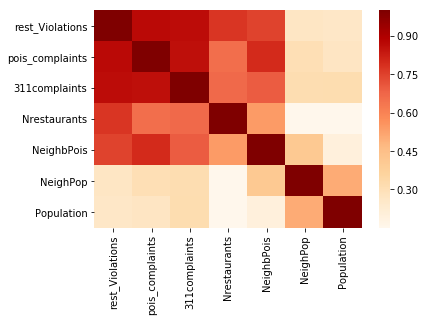

In [11]:
sns.heatmap(AllNT[['rest_Violations', 'pois_complaints', '311complaints', 'Nrestaurants', 'NeighbPois', 'NeighPop', 'Population']].corr()
           , cmap='OrRd')

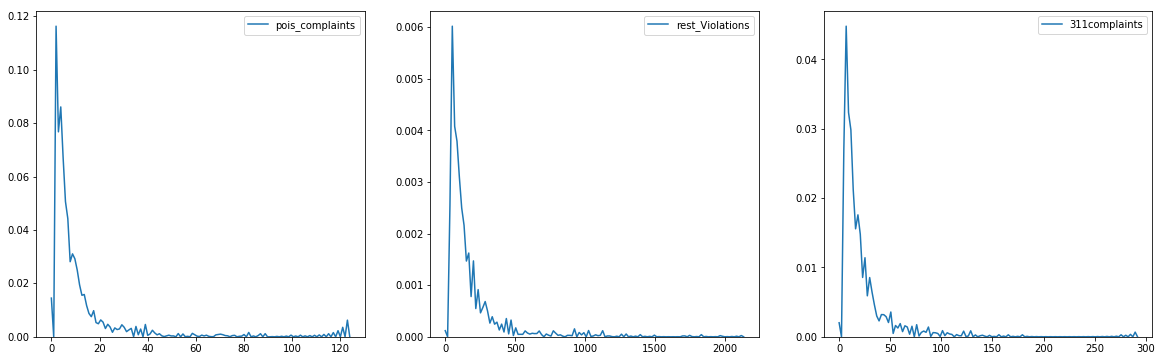

In [12]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(AllNT['pois_complaints'], bw=0.005)

ax2 = fig.add_subplot(132)
sns.kdeplot(AllNT['rest_Violations'], bw=0.005)

ax2 = fig.add_subplot(133)
sns.kdeplot(AllNT['311complaints'], bw=0.005)

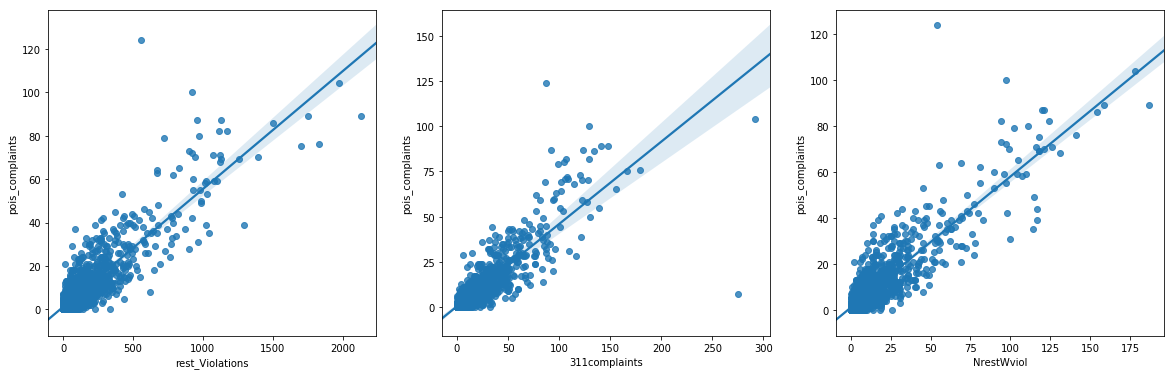

In [13]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.regplot(AllNT['rest_Violations'], AllNT['pois_complaints'])

ax2 = fig.add_subplot(132)
sns.regplot(AllNT['311complaints'], AllNT['pois_complaints'])

ax2 = fig.add_subplot(133)
sns.regplot(AllNT['NrestWviol'], AllNT['pois_complaints'])

In [14]:
X = AllNT[['rest_Violations', '311complaints', 'Population', 'Nrestaurants', 'NrestWviol']]
X = sm.add_constant(X)
y = np.matrix(AllNT['pois_complaints']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     2035.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:12:10   Log-Likelihood:                -6554.8
No. Observations:                2166   AIC:                         1.312e+04
Df Residuals:                    2160   BIC:                         1.316e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0540      0.223      0.243      0.808      -0.383       0.491
rest_Violations    -0.0014      0.003     -0.515      0.607      -0.007       0.004
311complaints       0.1928      0.010     19.606      0.000       0.174       0.212
Population          0.0001   5.29e-05      2.744      0.006    4.14e-05       0.000
Nrestaurants       -0.0406      0.007     -6.050      0.000      -0.054      -0.027
NrestWviol          0.4220      0.028     14.972      0.000       0.367       0.477
==============================================================================
Omnibus:                     1567.192   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           246844.629
Skew:                           2.487   Prob(JB):                         0.00
Kurtosis:                      55.061   Cond. No.                     9.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
AllNT['violPres'] = AllNT['rest_Violations']/AllNT['Nrestaurants']
AllNT['poisPres'] = AllNT['pois_complaints']/AllNT['Nrestaurants']
AllNT['311compPres'] = AllNT['311complaints']/AllNT['Nrestaurants']
AllNT['badRestProp'] = AllNT['NrestWviol']/AllNT['Nrestaurants']
AllNT.head(3)

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,311complaints,Nrestaurants,NEIGHBORS,NeighbPois,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,...,1.0,7.0,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777,0.0,0.000000,0.142857,0.142857,0.000000
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,...,102.0,154.0,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186,118.0,8.175325,0.448052,0.662338,0.766234
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,...,108.0,63.0,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181,97.0,14.619048,1.142857,1.714286,1.539683


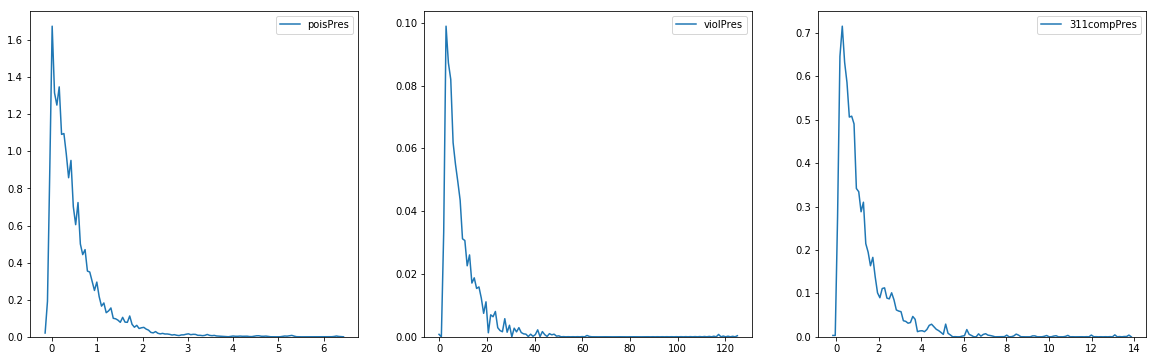

In [16]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(AllNT['poisPres'], bw=0.05)

ax2 = fig.add_subplot(132)
sns.kdeplot(AllNT['violPres'], bw=0.05)

ax2 = fig.add_subplot(133)
sns.kdeplot(AllNT['311compPres'], bw=0.05)

In [17]:
AllNT[['violPres', 'poisPres', '311compPres', 'badRestProp', 'Nrestaurants']].corr()

,violPres,poisPres,311compPres,badRestProp,Nrestaurants
violPres,1.000000,0.695778,0.707795,0.922889,-0.048940
poisPres,0.695778,1.000000,0.757965,0.709880,-0.094515
311compPres,0.707795,0.757965,1.000000,0.681675,-0.112353
badRestProp,0.922889,0.709880,0.681675,1.000000,-0.040707
Nrestaurants,-0.048940,-0.094515,-0.112353,-0.040707,1.000000


In [18]:
X = AllNT[['violPres', '311compPres', 'badRestProp']]
X = sm.add_constant(X)
y = np.matrix(AllNT['pois_complaints']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     110.7
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           1.10e-66
Time:                        13:12:10   Log-Likelihood:                -8287.1
No. Observations:                2166   AIC:                         1.658e+04
Df Residuals:                    2162   BIC:                         1.660e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4417      0.328     10.492      0.000       2.798       4.085
violPres        0.0092      0.078      0.118      0.906      -0.143       0.161
311compPres     0.9688      0.263      3.687      0.000       0.454       1.484
badRestProp     4.2707      0.800      5.336      0.000       2.701       5.840
==============================================================================
Omnibus:                     1900.654   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56435.737
Skew:                           4.144   Prob(JB):                         0.00
Kurtosis:                      26.593   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
data311elseCount = pd.read_csv('data311elseCount.csv')
AllNT = AllNT.merge(data311elseCount, on='boro_ct201', how='outer')
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,NEIGHBORS,NeighbPois,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp,Unnamed: 0,Tot311comp
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,...,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777,0.0,0.000000,0.142857,0.142857,0.000000,2058.0,5293.0
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,...,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186,118.0,8.175325,0.448052,0.662338,0.766234,97.0,10319.0
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,...,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181,97.0,14.619048,1.142857,1.714286,1.539683,99.0,6074.0
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,...,"[1010000, 1010200, 1010400, 1009200, 1011202, ...",424.0,8056,69.0,13.000000,0.976190,1.880952,1.642857,101.0,4570.0
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,...,"[1010200, 1010400, 1012500, 1013100, 1011202, ...",492.0,14863,104.0,5.862857,0.337143,0.462857,0.594286,103.0,6037.0


In [20]:
AllNT.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT.fillna(value={'Tot311comp':0}, inplace=True)

In [21]:
AllNT['311Prop'] = AllNT['311complaints']/AllNT['Tot311comp']
AllNT[['violPres', 'poisPres', '311compPres', 'badRestProp', 'Nrestaurants', '311Prop']].corr()

,violPres,poisPres,311compPres,badRestProp,Nrestaurants,311Prop
violPres,1.000000,0.695778,0.707795,0.922889,-0.048940,0.279107
poisPres,0.695778,1.000000,0.757965,0.709880,-0.094515,0.290142
311compPres,0.707795,0.757965,1.000000,0.681675,-0.112353,0.397114
badRestProp,0.922889,0.709880,0.681675,1.000000,-0.040707,0.280875
Nrestaurants,-0.048940,-0.094515,-0.112353,-0.040707,1.000000,0.393403
311Prop,0.279107,0.290142,0.397114,0.280875,0.393403,1.000000


In [22]:
AllNT.dropna(subset=['311Prop'], inplace=True)

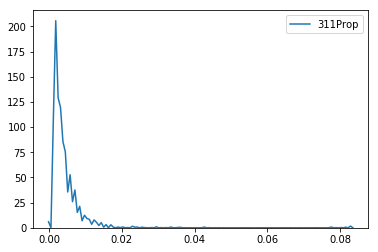

In [23]:
sns.kdeplot(AllNT['311Prop'], bw=0.00005)

In [24]:
X = AllNT[['violPres', '311compPres', 'badRestProp', '311Prop']]
X = sm.add_constant(X)
y = np.matrix(AllNT['poisPres']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     976.6
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:12:11   Log-Likelihood:                -941.02
No. Observations:                2163   AIC:                             1892.
Df Residuals:                    2158   BIC:                             1920.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0445      0.012      3.862      0.000       0.022       0.067
violPres     9.706e-05      0.003      0.037      0.970      -0.005       0.005
311compPres     0.2511      0.009     27.152      0.000       0.233       0.269
badRestProp     0.2897      0.027     10.738      0.000       0.237       0.343
311Prop        -2.6110      2.127     -1.227      0.220      -6.783       1.561
==============================================================================
Omnibus:                      735.512   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13243.580
Skew:                           1.129   Prob(JB):                         0.00
Kurtosis:                      14.910   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
AllNT[['violPres', '311compPres', 'badRestProp', '311Prop']].corr()

,violPres,311compPres,badRestProp,311Prop
violPres,1.000000,0.707500,0.922807,0.279107
311compPres,0.707500,1.000000,0.681348,0.397114
badRestProp,0.922807,0.681348,1.000000,0.280875
311Prop,0.279107,0.397114,0.280875,1.000000


In [26]:
avgGrades = pd.read_csv('avgGrades.csv')
avgGrades.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT = AllNT.merge(avgGrades, on='boro_ct201', how='outer')
AllNT.fillna(value={'avgGrade':np.mean(avgGrades.avgGrade.values)}, inplace=True)
avgGrades.head()

,avgGrade,boro_ct201
0,82.935323,1009800
1,81.990632,1010000
2,86.045016,1010200
3,81.159136,1010400
4,80.638686,1011300


In [27]:
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,NeighbPois,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp,Tot311comp,311Prop,avgGrade
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,...,35.0,18777,0.0,0.000000,0.142857,0.142857,0.000000,5293.0,0.000189,82.960784
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,...,291.0,40186,118.0,8.175325,0.448052,0.662338,0.766234,10319.0,0.009885,82.935323
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,...,386.0,30181,97.0,14.619048,1.142857,1.714286,1.539683,6074.0,0.017781,81.990632
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,...,424.0,8056,69.0,13.000000,0.976190,1.880952,1.642857,4570.0,0.017287,86.045016
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,...,492.0,14863,104.0,5.862857,0.337143,0.462857,0.594286,6037.0,0.013417,81.159136


In [28]:
AllNT[['poisPres', 'violPres', '311compPres', 'badRestProp', '311Prop', 'avgGrade']].corr()

,poisPres,violPres,311compPres,badRestProp,311Prop,avgGrade
poisPres,1.000000,0.695482,0.757735,0.709594,0.290142,-0.072222
violPres,0.695482,1.000000,0.707500,0.922807,0.279107,-0.208079
311compPres,0.757735,0.707500,1.000000,0.681348,0.397114,-0.100090
badRestProp,0.709594,0.922807,0.681348,1.000000,0.280875,-0.076877
311Prop,0.290142,0.279107,0.397114,0.280875,1.000000,-0.067005
avgGrade,-0.072222,-0.208079,-0.100090,-0.076877,-0.067005,1.000000


In [29]:
X = AllNT[['violPres', '311compPres', 'badRestProp', '311Prop', 'avgGrade']]
X = sm.add_constant(X)
y = np.matrix(AllNT['poisPres']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     781.1
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:12:11   Log-Likelihood:                -940.87
No. Observations:                2163   AIC:                             1894.
Df Residuals:                    2157   BIC:                             1928.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0205      0.121     -0.170      0.865      -0.258       0.217
violPres        0.0006      0.003      0.226      0.821      -0.005       0.006
311compPres     0.2509      0.009     27.088      0.000       0.233       0.269
badRestProp     0.2850      0.028     10.071      0.000       0.230       0.341
311Prop        -2.5613      2.130     -1.203      0.229      -6.738       1.615
avgGrade        0.0008      0.001      0.541      0.589      -0.002       0.004
==============================================================================
Omnibus:                      735.449   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13213.591
Skew:                           1.130   Prob(JB):                         0.00
Kurtosis:                      14.896   Cond. No.                     2.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
majCuisine = pd.read_csv('majCuisine.csv')
majCuisine.drop(columns={'Unnamed: 0'}, inplace=True)

AllNT = AllNT.merge(majCuisine, on='boro_ct201', how='outer')
AllNT.fillna(value={'majCuisine':'American'}, inplace=True)
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp,Tot311comp,311Prop,avgGrade,majCuisine
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,...,18777,0.0,0.000000,0.142857,0.142857,0.000000,5293.0,0.000189,82.960784,American
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,...,40186,118.0,8.175325,0.448052,0.662338,0.766234,10319.0,0.009885,82.935323,American
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,...,30181,97.0,14.619048,1.142857,1.714286,1.539683,6074.0,0.017781,81.990632,American
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,...,8056,69.0,13.000000,0.976190,1.880952,1.642857,4570.0,0.017287,86.045016,American
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,...,14863,104.0,5.862857,0.337143,0.462857,0.594286,6037.0,0.013417,81.159136,American


In [31]:
sum(AllNT['Nrestaurants'])

38325.0

In [32]:
counts = AllNT.groupby(by='majCuisine', as_index=False).count()[['majCuisine', 'Nrestaurants']].sort_values(by='Nrestaurants', ascending=False)
counts = counts[0:10]

<Figure size 720x720 with 0 Axes>

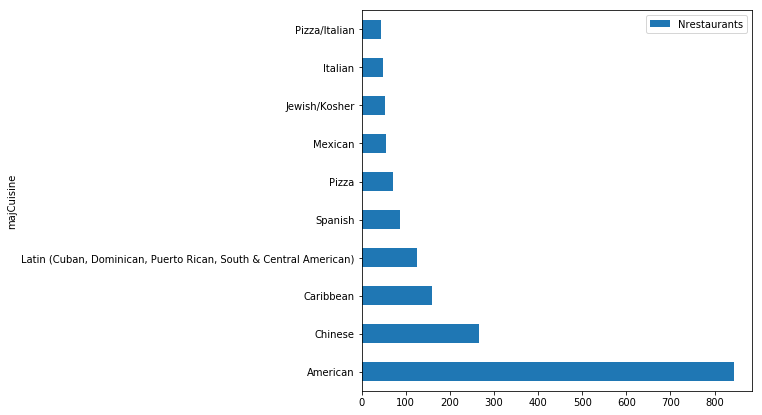

In [33]:
plt.figure(figsize=(10,10))
counts.plot.barh(x='majCuisine', rot=0, figsize=(7,7))

In [34]:
# #rest score?

In [36]:
AllNT

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp,Tot311comp,311Prop,avgGrade,majCuisine
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,...,18777,0.0,0.000000,0.142857,0.142857,0.000000,5293.0,0.000189,82.960784,American
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,...,40186,118.0,8.175325,0.448052,0.662338,0.766234,10319.0,0.009885,82.935323,American
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,...,30181,97.0,14.619048,1.142857,1.714286,1.539683,6074.0,0.017781,81.990632,American
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,...,8056,69.0,13.000000,0.976190,1.880952,1.642857,4570.0,0.017287,86.045016,American
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,...,14863,104.0,5.862857,0.337143,0.462857,0.594286,6037.0,0.013417,81.159136,American
5,1,1011300,Manhattan,11300,"POLYGON ((-73.98411754823195 40.7548420534646,...",1.890907e+06,111300,2010,Manhattan,117,...,17539,120.0,10.780952,0.828571,1.171429,1.142857,8575.0,0.014344,80.638686,American
6,1,1011402,Manhattan,11402,POLYGON ((-73.96475544914023 40.76405707059968...,1.063547e+06,111402,2010,Manhattan,2397,...,29463,34.0,17.380952,1.714286,1.190476,1.619048,3683.0,0.006788,80.117647,American
7,1,1013000,Manhattan,13000,POLYGON ((-73.96147581181627 40.77432401139124...,1.918145e+06,113000,2010,Manhattan,4195,...,30369,12.0,5.000000,0.333333,0.523810,0.571429,4173.0,0.002636,81.052632,American
8,1,1014000,Manhattan,14000,POLYGON ((-73.95494520074165 40.77750394666422...,1.925984e+06,114000,2010,Manhattan,7813,...,55789,44.0,8.265306,0.448980,1.326531,0.897959,6625.0,0.009811,87.846154,American
9,1,1014801,Manhattan,14801,POLYGON ((-73.95398370221397 40.77882211011827...,5.592162e+05,114801,2010,Manhattan,2863,...,54557,14.0,12.714286,5.285714,4.428571,2.000000,3215.0,0.009642,89.444444,Pizza/Italian


In [ ]:
##kde

from sklearn.neighbors import KernelDensity



In [ ]:
Xtrain = np.vstack((data['train']['dd lat'],
                    data['train']['dd long']]).T
#ytrain = np.array([d.decode('ascii').startswith('micro')
#                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.